## Observations and Insights 

In [74]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how='outer' )

# Display the data table for preview
study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [75]:
# Checking the number of mice.
mice_count = study_data['Mouse ID'].nunique()
mice_count

249

In [76]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
study_data['Is_duplicate'] = study_data.duplicated()
study_data.loc[study_data['Is_duplicate']==True]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Is_duplicate
909,g989,Propriva,Female,21,26,0,45.0,0,True


In [77]:
# Optional: Get all the data for the duplicate mouse ID. 



In [78]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data = study_data.loc[study_data['Is_duplicate']==False]
study_data = study_data.drop(['Is_duplicate'], axis=1)
study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [79]:
# Checking the number of mice in the clean DataFrame.
mice_count = study_data['Mouse ID'].nunique()
mice_count

249

## Summary Statistics

In [80]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
drug_group_data = study_data.groupby(['Drug Regimen'])

# mean, median, variance, standard deviation, and SEM of the tumor volume.
avg_tumor = drug_group_data['Tumor Volume (mm3)'].mean()

med_tumor = drug_group_data['Tumor Volume (mm3)'].median()

var_tumor = drug_group_data['Tumor Volume (mm3)'].var()

std_tumor = drug_group_data['Tumor Volume (mm3)'].std()

sem_tumor = drug_group_data['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
tumor_summary = {'Mean (Tumor Vol.)': avg_tumor, 'Median (Tumor Vol.)': med_tumor,'Variance (Tumor Vol.)': var_tumor, 'Std Deviation (Tumor Vol.)': std_tumor, 'SEM': sem_tumor}

summary_df = pd.DataFrame(tumor_summary)
summary_df

,Mean (Tumor Vol.),Median (Tumor Vol.),Variance (Tumor Vol.),Std Deviation (Tumor Vol.),SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [91]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

drug_group_data['Tumor Volume (mm3)'].describe()


,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,160.0,52.368318,6.502160,45.000000,47.107256,50.909965,56.259803,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ceftamin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Ketapril'),
  Text(4, 0, 'Naftisol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Propriva'),
  Text(7, 0, 'Ramicane'),
  Text(8, 0, 'Stelasyn'),
  Text(9, 0, 'Zoniferol')])

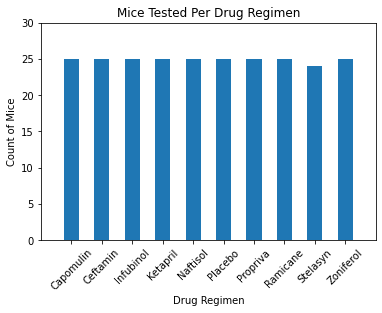

In [82]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# Count of mice tested on each drug
mice_per_drug = drug_group_data['Mouse ID'].nunique()

# Generate bar plot
mice_count_chart = mice_per_drug.plot(kind='bar')

plt.title('Mice Tested Per Drug Regimen')
plt.ylabel('Count of Mice')
plt.xlabel('Drug Regimen')
plt.ylim(0,30)
plt.xlim(-1, 10)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

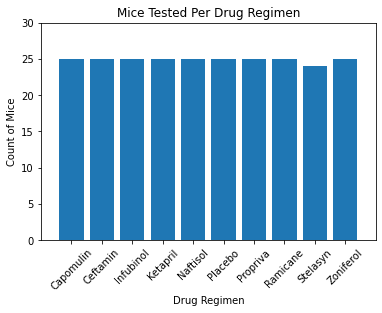

In [88]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

drug = ['Capomulin', 'Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']

# Generate bar plot
mice_count_pltchart = plt.bar(drug, mice_per_drug)

plt.title('Mice Tested Per Drug Regimen')
plt.ylabel('Count of Mice')
plt.xlabel('Drug Regimen')
plt.ylim(0,30)
plt.xlim(-1, 10)
plt.xticks(rotation=45)

Text(0, 0.5, '')

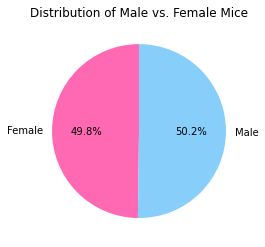

In [118]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Group by gender
gender_group = study_data.groupby('Sex')

# Count every unique Mouse ID by gender
mice_gender = gender_group['Mouse ID'].nunique()

# Generate pie plot
colors = ['hotpink', 'lightskyblue']
mice_gender_chart = mice_gender.plot(kind='pie', colors=colors, autopct="%1.1f%%", startangle=90)

plt.title('Distribution of Male vs. Female Mice')
plt.ylabel('')

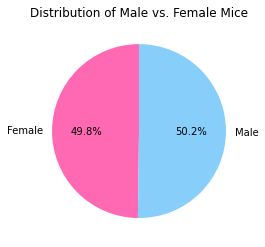

In [121]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_gender, colors=colors,
        autopct="%1.1f%%", startangle=90, labels=['Female','Male'])
plt.title('Distribution of Male vs. Female Mice')
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
